# Topic Analysis
Cluster speech data into distinct topics

## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

## Plot Settings

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects

In [4]:
# format style
plt.style.use('fivethirtyeight')
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=20)

## Functions

In [5]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}: ".format(index)
        message += "; ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

## Data

In [6]:
transcripts = pd.read_csv('data/cln_transcripts.csv', index_col=0)
# convert Date column to datetime format
transcripts['Date'] = pd.to_datetime(transcripts['Date'])
transcripts.head()

,Title,Date,President,Type,Transcript
0,"April 30, 1789: First Inaugural Address",1789-04-30,George Washington,inauguration,Fellow Citizens of the Senate and the House of...
1,"October 3, 1789: Thanksgiving Proclamation",1789-10-03,George Washington,other,Whereas it is the duty of all Nations to ackno...
2,"January 8, 1790: First Annual Message to Congress",1790-01-08,George Washington,state_union,Fellow Citizens of the Senate and House of Rep...
3,"December 8, 1790: Second Annual Message to Con...",1790-12-08,George Washington,state_union,Fellow citizens of the Senate and House of Rep...
4,"December 29, 1790: Talk to the Chiefs and Coun...",1790-12-29,George Washington,other,"I the President of the United States, by my ow..."


# Vectorize Document Text
Create sparse matrix of word counts for each document (presidential address)

In [7]:
# text data
documents = transcripts['Transcript']

In [8]:
# number of documents
num_docs = len(documents)

## TFIDF

In [9]:
# create instance of TFIDF vectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.05, ngram_range=(1, 3))

In [10]:
# transform documents into document-term matrix
X = tf_vectorizer.fit_transform(documents)

In [11]:
# create dataframe of document-term matrix
tf_df = pd.DataFrame(X.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df.head()

,000,000 000,000 men,000 people,000 year,10,10 000,10 years,100,100 000,...,yes,yesterday,yield,yielding,york,young,young men,young people,youth,zeal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.050819
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02925,0.023455,0.036168,0.0,0.0,0.000000


# Topic Modeling
Generate topics using clustering...

## NMF

In [12]:
# number of topics
num_tops = 20
# create instance of model, input number of topics to output
nmf = NMF(n_components=num_tops, random_state=0)
# run model
nmf.fit(tf_df)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [13]:
# create array of topic weights per document
topic_array = nmf.transform(tf_df)

In [14]:
# display top words for each topic
print_top_words(nmf, tf_vectorizer.get_feature_names(), 25)


Topic #0: public; commerce; states; congress; british; great; vessels; citizens; war; country; subject; session; treasury; present; tribes; united states; united; necessary; objects; measures; debt; effect; revenue; peace; militia

Topic #1: america; americans; tonight; jobs; new; health; work; health care; children; care; people; american; help; year; child; families; let; businesses; workers; make; economy; insurance; need; college; years

Topic #2: states; united states; united; persons; president united states; president united; proclamation; president; said; united states america; states america; laws; day; independence united states; independence united; whereof; seal; state; city washington; laws united; laws united states; secretary state; thereof; city; america

Topic #3: ve; going; don; people; want; know; got; ll; just; thank; lot; think; like; say; ve got; said; didn; tell; thing; right; everybody; folks; country; years; way

Topic #4: president; mr; mr president; think; c

In [16]:
# general category dictionary
category_dict = {
    0: 'National Issues',
    1: 'National Issues',
    2: 'Government',
    3: 'General Words',
    4: 'Government',
    5: 'Government',
    6: 'Economy',
    7: 'War',
    8: 'War',
    9: 'War',
    10: 'Government',
    11: 'Economy',
    12: 'Economy',
    13: 'International',
    14: 'War',
    15: 'International',
    16: 'Ideals',
    17: 'Government',
    18: 'Ideals',
    19: 'Economy'
}

In [17]:
# topic label dictionary
topic_dict = {
    0: 'National Issues - Sovereignty',
    1: 'National Issues - People',
    2: 'Government - Nation',
    3: 'General Words - General Words',
    4: 'Government - Officials',
    5: 'Government - Organization',
    6: 'Economy - Policy 1',
    7: 'War - Cold War',
    8: 'War - Vietnam War',
    9: 'War - Terror',
    10: 'Government - Departments',
    11: 'Economy - Currency',
    12: 'Economy - Commerce',
    13: 'International - Latin America',
    14: 'War - World War II',
    15: 'International - Global',
    16: 'Ideals - Exemplar',
    17: 'Government - Law',
    18: 'Ideals - Values',
    19: 'Economy - Policy 2'
}

In [18]:
# create topic dataframe
topic_df = pd.DataFrame(topic_array, columns=topic_dict.values())
# convert topic weights to percentile per document
topic_df = round(topic_df.div(topic_df.sum(axis=1), axis=0)*100, 0)
topic_df.head()

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
0,19.0,0.0,2.0,0.0,3.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
1,5.0,0.0,9.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0
2,45.0,2.0,5.0,0.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0
3,76.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,13.0,0.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,18.0,0.0,10.0,0.0,0.0,6.0,0.0


In [19]:
# create category dataframe
cat_df = topic_df.copy()
# use categories for column labels
cat_df.columns = category_dict.values()
# sum rows by column name
cat_df = cat_df.groupby(cat_df.columns, axis=1).sum()
cat_df.head()

,Economy,General Words,Government,Ideals,International,National Issues,War
0,0.0,0.0,73.0,7.0,0.0,19.0,0.0
1,0.0,0.0,83.0,6.0,5.0,5.0,0.0
2,0.0,0.0,50.0,0.0,3.0,47.0,1.0
3,10.0,0.0,12.0,0.0,0.0,76.0,1.0
4,1.0,4.0,50.0,6.0,28.0,13.0,0.0


# Topic Vizualization

In [20]:
# dictionary to map each category to a color
cat_colors = {
    'Government': 'darkblue', 
    'Economy': 'darkgreen', 
    'War': 'darkred',
    'Ideals': 'darkorange',
    'International': 'purple', 
    'National Issues': 'teal',
    'General Words': 'grey'  
}

## TSNE Plot

In [21]:
def scatter(x, points, colors):

    # create scatter plot
    f = plt.figure(figsize=(20, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, color=colors)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # label clusters
    txts = []
    for i in range(len(np.unique(points))):
        # position labels
        xtext, ytext = np.median(x[points == i, :], axis=0)
        # label by specific topic
        txt = ax.text(xtext, ytext, topic_dict[i].split(' - ')[1], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="whitesmoke"),
            PathEffects.Normal()])
        txts.append(txt)

    # color legend
    patch_list = []
    for patch in cat_colors.keys():
        patch_list.append(mpatches.Patch(color=cat_colors[patch], label=patch))
    ax.legend(handles=patch_list, loc="upper left")
    
    return(f, ax, sc, txts)

In [22]:
# create tsne object based on topic array
tsne = TSNE(metric="cosine", random_state=0).fit_transform(topic_array)

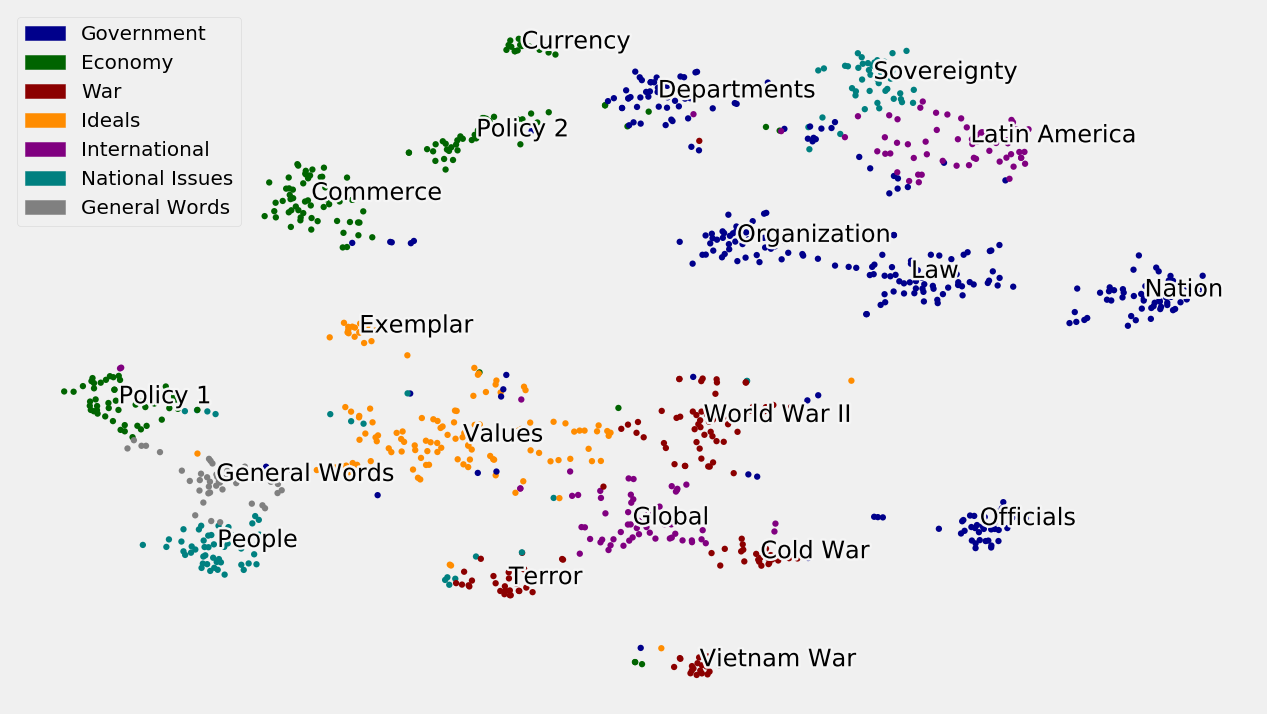

In [24]:
# array of top topic # per document
top_topics = np.argmax(topic_array, axis=1)
# assign colors to topic array
color_array = np.vectorize(cat_colors.__getitem__)(np.vectorize(category_dict.__getitem__)(top_topics))
# call plot function
scatter(tsne, top_topics, color_array);
# save plot image
# plt.savefig('model_output/tsne.png', bbox_inches='tight')

## Plot Topic Frequency

### Topic Frequency

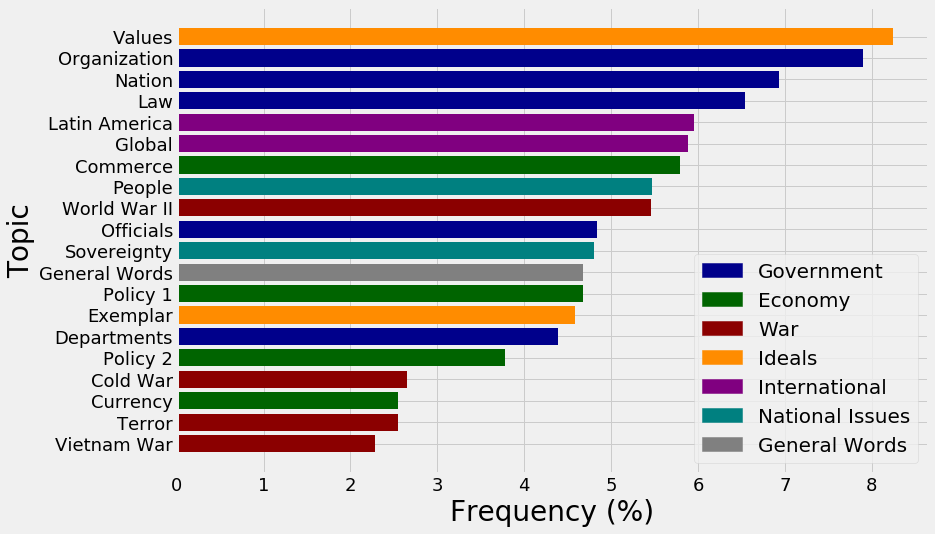

In [25]:
# categories for sorted topic dataframe
top_cats = [label.split(' - ')[0] for label in topic_df.mean().sort_values().index]
# topics for sorted topic dataframe
tops = [label.split(' - ')[1] for label in topic_df.mean().sort_values().index]

# bar plot of topic frequencies
x = tops
y = topic_df.mean().sort_values()
# list of topic color based on its category
color_list = [cat_colors[cat] for cat in top_cats]

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y, color=color_list)
ax.set_yticks(range(len(x)))
ax.set_yticklabels(x)
ax.set_ylabel('Topic')
ax.set_xlabel('Frequency (%)')
# color legend
patch_list = []
for patch in cat_colors.keys():
    patch_list.append(mpatches.Patch(color=cat_colors[patch], label=patch))
plt.legend(handles=patch_list);
# save plot image
# plt.savefig('model_output/top_freq.png', bbox_inches='tight')

### Category Frequency

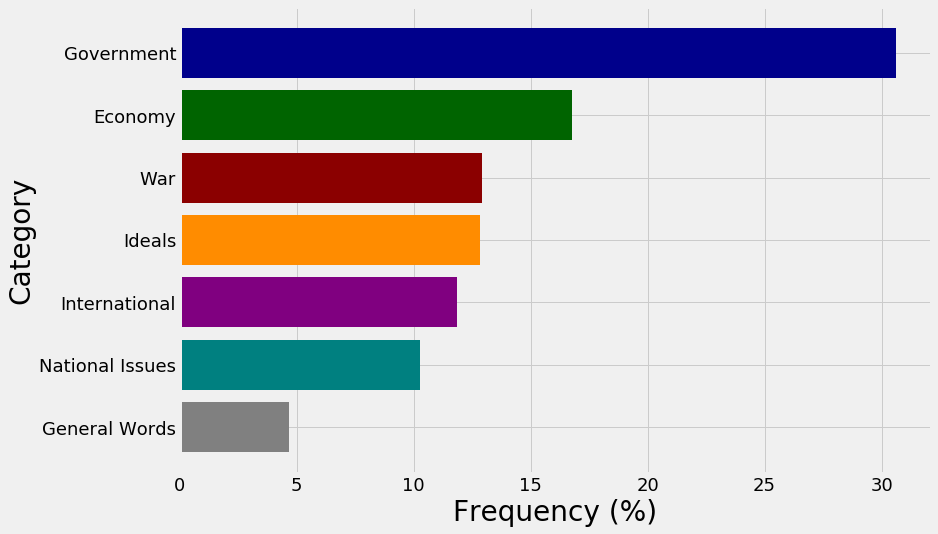

In [26]:
x = cat_df.mean().sort_values().index
y = cat_df.mean().sort_values()
color_list = [cat_colors[cat] for cat in cat_df.mean().sort_values().index]

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y, color=color_list)
ax.set_yticks(range(len(x)))
ax.set_yticklabels(x)
ax.set_ylabel('Category')
ax.set_xlabel('Frequency (%)');
# save plot image
# plt.savefig('model_output/cat_freq.png', bbox_inches='tight');

# Topic Analysis

## Sort Topics
Order topic components by weight (percentage) within each document

In [33]:
# topic component percentage array
top_val_sort = topic_df.values.copy()
# sort array by rows (ascending order)
top_val_sort.sort(axis=1)
# sort array in descending order
top_val_sort = top_val_sort[:, ::-1]

In [34]:
# sort topic label array by row (ascending order)
top_lab_sort = np.argsort(topic_df.values)
# sort array in descending order
top_lab_sort = top_lab_sort[:, ::-1]

In [35]:
# interweave sorted label and value arrays for dataframe
top_sort = np.empty((num_docs, num_tops*2))
top_sort[:, 0::2] = top_lab_sort
top_sort[:, 1::2] = top_val_sort

In [36]:
# create primary column labels for dataframe
top_order = []

for place in range(0, num_tops):
    top_order.append('Topic ' + str(place+1))

In [100]:
# function to map topic labels to topic numbers
def top_map(x):
    return(topic_dict[x])

In [148]:
# create final topic dataframe
top_topic_df = pd.DataFrame(top_sort, dtype=int)
# map topic labels
top_topic_df.iloc[:, ::2] = top_topic_df.iloc[:, ::2].applymap(top_map)
# create index for multi-dimensional dataframe
m_idx = pd.MultiIndex.from_product([top_order, ['Topic', '%']])
# create multidimensional dataframe
top_topic_df = pd.DataFrame(top_topic_df.values, columns=m_idx)
# retain only highest topics
top_topic_df = top_topic_df[top_order[:5]]
top_topic_df.head()

Topic 1                            Topic 2      \
                           Topic   %                          Topic   %   
0      Government - Organization  68  National Issues - Sovereignty  19   
1      Government - Organization  74            Government - Nation   9   
2  National Issues - Sovereignty  45      Government - Organization  39   
3  National Issues - Sovereignty  76             Economy - Commerce  10   
4            Government - Nation  45  International - Latin America  18   

                         Topic 3                            Topic 4      \
                           Topic   %                          Topic   %   
0                Ideals - Values   7         Government - Officials   3   
1                Ideals - Values   6  National Issues - Sovereignty   5   
2               Government - Law   6            Government - Nation   5   
3         Government - Officials   6               Government - Law   5   
4  National Issues - Sovereignty  13         International - Global  10   

                     Topic 5     
                       Topic  %  
0        Government - Nation  2  
1     International - Global  5  
2     International - Global  3  
3  Government - Organization  1  
4            Ideals - Values  6

In [149]:
# insert transcript info into top topics dataframe
address_df = top_topic_df.copy()
for column in transcripts.columns[::-1]:
    address_df.insert(0, column, transcripts[column])
address_df.head()

Title        Date  \
                                                                   
0            April 30, 1789: First Inaugural Address  1789-04-30   
1         October 3, 1789: Thanksgiving Proclamation  1789-10-03   
2  January 8, 1790: First Annual Message to Congress  1790-01-08   
3  December 8, 1790: Second Annual Message to Con...  1790-12-08   
4  December 29, 1790: Talk to the Chiefs and Coun...  1790-12-29   

           President          Type  \
                                     
0  George Washington  inauguration   
1  George Washington         other   
2  George Washington   state_union   
3  George Washington   state_union   
4  George Washington         other   

                                          Transcript  \
                                                       
0  Fellow Citizens of the Senate and the House of...   
1  Whereas it is the duty of all Nations to ackno...   
2  Fellow Citizens of the Senate and House of Rep...   
3  Fellow citizens of the Senate and House of Rep...   
4  I the President of the United States, by my ow...   

                         Topic 1                            Topic 2      \
                           Topic   %                          Topic   %   
0      Government - Organization  68  National Issues - Sovereignty  19   
1      Government - Organization  74            Government - Nation   9   
2  National Issues - Sovereignty  45      Government - Organization  39   
3  National Issues - Sovereignty  76             Economy - Commerce  10   
4            Government - Nation  45  International - Latin America  18   

                         Topic 3                            Topic 4      \
                           Topic   %                          Topic   %   
0                Ideals - Values   7         Government - Officials   3   
1                Ideals - Values   6  National Issues - Sovereignty   5   
2               Government - Law   6            Government - Nation   5   
3         Government - Officials   6               Government - Law   5   
4  National Issues - Sovereignty  13         International - Global  10   

                     Topic 5     
                       Topic  %  
0        Government - Nation  2  
1     International - Global  5  
2     International - Global  3  
3  Government - Organization  1  
4            Ideals - Values  6

## Categories over Time

In [27]:
# add Date column
cat_df['Date'] = transcripts.iloc[:, 1]
cat_df.head()

,Economy,General Words,Government,Ideals,International,National Issues,War,Date
0,0.0,0.0,73.0,7.0,0.0,19.0,0.0,1789-04-30
1,0.0,0.0,83.0,6.0,5.0,5.0,0.0,1789-10-03
2,0.0,0.0,50.0,0.0,3.0,47.0,1.0,1790-01-08
3,10.0,0.0,12.0,0.0,0.0,76.0,1.0,1790-12-08
4,1.0,4.0,50.0,6.0,28.0,13.0,0.0,1790-12-29


In [28]:
# function to plot topic category proportions by year
def barplot_cats(df, start_yr, end_yr, colors):
    df[(df.index >= start_yr) & (df.index <= end_yr)].plot(kind='bar', stacked=True, color=colors)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [29]:
# average topic category percentage by year
time_cats = cat_df.groupby(cat_df['Date'].dt.year).mean()
# colors for time categories
time_color_list = [cat_colors[cat] for cat in time_cats.columns]

# War

In [25]:
# add Date column to category dataframe
cat_df['Date'] = transcripts.iloc[:, 1]
cat_df.head()

,Economy,General Words,Government,Ideals,International,National Issues,War,Date
0,0.0,0.0,73.0,7.0,0.0,19.0,0.0,1789-04-30
1,0.0,0.0,83.0,6.0,5.0,5.0,0.0,1789-10-03
2,0.0,0.0,50.0,0.0,3.0,47.0,1.0,1790-01-08
3,10.0,0.0,12.0,0.0,0.0,76.0,1.0,1790-12-08
4,1.0,4.0,50.0,6.0,28.0,13.0,0.0,1790-12-29


In [21]:
# add Date column to topic dataframe
topic_df['Date'] = transcripts.iloc[:, 1]
topic_df.head()

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,...,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2,Date
0,19.0,0.0,2.0,0.0,3.0,68.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1789-04-30
1,5.0,0.0,9.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0,1789-10-03
2,45.0,2.0,5.0,0.0,0.0,39.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,1790-01-08
3,76.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1790-12-08
4,13.0,0.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,0.0,10.0,0.0,0.0,6.0,0.0,1790-12-29


## Civil War

### Lincoln Addresses

In [22]:
start_date = '1861-04-12'
end_date = '1865-04-09'
pres = 'Abraham Lincoln'

In [23]:
# topics
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_tops = topic_df.iloc[spkr_idx, :].groupby(topic_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_tops

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
1861,4.50,0.0,3.0,1.00,0.5,26.50,0.00,3.50,0.5,0.5,15.5,0.5,2.5,1.0,6.50,0.0,0.0,23.5,1.5,8.5
1862,9.00,0.0,7.0,2.00,0.0,2.00,0.00,0.00,2.0,0.0,16.0,9.0,0.0,10.0,4.00,4.0,0.0,11.0,7.0,18.0
1863,3.75,0.0,21.0,1.25,0.5,7.25,0.25,1.25,0.5,0.0,9.0,0.0,1.0,2.0,18.75,0.0,0.0,11.5,21.0,1.0
1864,6.00,0.0,2.0,2.00,3.5,9.00,0.50,1.00,0.0,0.0,18.0,3.0,0.0,23.0,6.50,0.0,6.0,14.0,1.0,4.0
1865,6.00,0.0,0.0,0.00,0.0,3.00,0.00,4.00,5.0,0.0,0.0,0.0,0.0,0.0,36.00,0.0,7.0,12.0,27.0,0.0


In [26]:
# categories
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_cats = cat_df.iloc[spkr_idx, :].groupby(cat_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_cats

,Economy,General Words,Government,Ideals,International,National Issues,War
Date,,,,,,,
1861,11.50,1.00,69.00,1.5,1.0,4.50,11.0
1862,27.00,2.00,36.00,7.0,14.0,9.00,6.0
1863,2.25,1.25,49.25,21.0,2.0,3.75,20.5
1864,7.50,2.00,46.50,7.0,23.0,6.00,7.5
1865,0.00,0.00,15.00,34.0,0.0,6.00,45.0


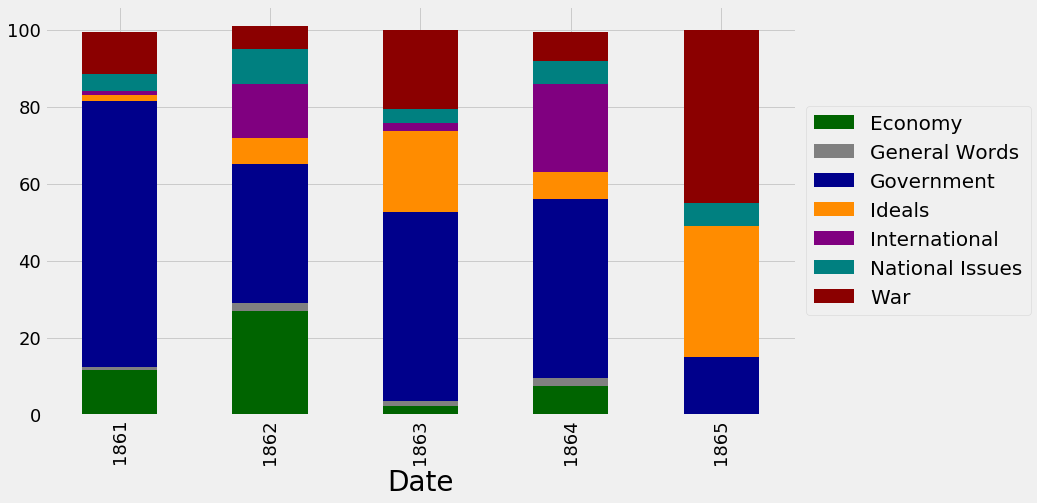

In [60]:
color_list = [cat_colors[cat] for cat in time_cats.columns]
time_cats.plot(kind='bar', stacked=True, color=color_list)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## WW2

### FDR Addresses

In [61]:
start_date = '1939-09-01'
end_date = '1945-09-02'
pres = 'Franklin D. Roosevelt'

In [62]:
# topics
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_tops = topic_df.iloc[spkr_idx, :].groupby(topic_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_tops

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
1939,3.00,1.000000,11.000000,3.000,3.000000,7.000000,0.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,17.000000,17.000000,0.000000,6.000000,0.000000
1940,0.00,1.250000,5.500000,0.500,1.250000,11.250000,6.000,0.500000,0.000000,0.000000,0.500000,0.000000,6.750000,3.000000,28.250000,11.750000,7.250000,0.000000,13.500000,3.000000
1941,0.75,1.000000,9.000000,0.875,0.875000,3.375000,2.875,0.625000,0.000000,0.125000,0.125000,0.125000,3.375000,4.750000,39.250000,9.875000,9.375000,0.250000,13.125000,0.125000
1942,0.00,4.000000,0.500000,2.000,1.250000,0.000000,6.500,0.000000,0.000000,0.000000,0.000000,0.500000,8.750000,2.000000,64.250000,4.500000,0.000000,0.750000,4.500000,0.500000
1943,0.00,4.166667,1.166667,2.500,2.333333,0.333333,2.000,1.333333,0.333333,0.333333,0.000000,0.666667,3.166667,0.166667,58.333333,13.666667,1.000000,0.500000,4.500000,3.333333
1944,0.00,4.250000,2.000000,1.500,0.750000,2.500000,4.000,1.500000,0.750000,0.000000,0.250000,1.250000,6.000000,0.000000,51.500000,10.750000,7.000000,1.750000,5.000000,0.250000
1945,0.00,0.000000,0.000000,2.000,5.000000,7.333333,0.000,2.000000,0.000000,0.000000,1.666667,0.000000,1.000000,2.333333,27.000000,28.000000,3.333333,4.666667,15.666667,0.000000


In [63]:
# categories
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_cats = cat_df.iloc[spkr_idx, :].groupby(cat_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_cats

,Economy,General Words,Government,Ideals,International,National Issues,War
Date,,,,,,,
1939,0.000000,3.000,21.000000,23.00,17.000000,4.000000,31.000000
1940,15.750000,0.500,18.500000,20.75,14.750000,1.250000,28.750000
1941,6.500000,0.875,13.625000,22.50,14.625000,1.750000,40.000000
1942,16.250000,2.000,2.500000,4.50,6.500000,4.000000,64.250000
1943,9.166667,2.500,4.333333,5.50,13.833333,4.166667,60.333333
1944,11.500000,1.500,7.250000,12.00,10.750000,4.250000,53.750000
1945,1.000000,2.000,18.666667,19.00,30.333333,0.000000,29.000000


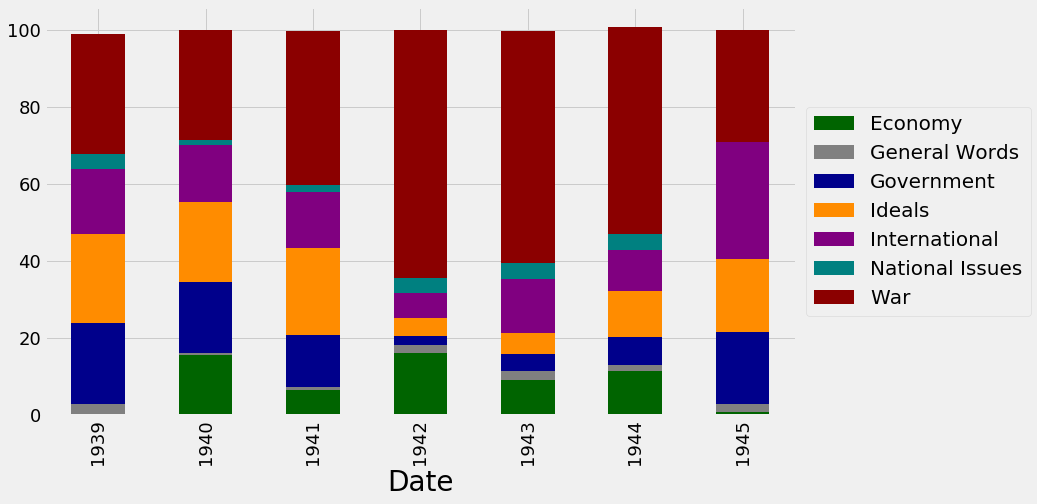

In [64]:
color_list = [cat_colors[cat] for cat in time_cats.columns]
time_cats.plot(kind='bar', stacked=True, color=color_list)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## Vietnam

In [70]:
start_date = '1964-08-02'
end_date = '1975-04-30'
pres = 'Lyndon B. Johnson'

In [71]:
# topics
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_tops = topic_df.iloc[spkr_idx, :].groupby(topic_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_tops

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
1964,0.000000,6.000000,9.600000,5.000000,6.200000,0.800000,0.200000,10.000000,10.400000,2.400000,0.000000,0.000000,0.800000,3.800000,4.800000,14.80000,8.800000,1.000000,14.200000,0.000000
1965,0.000000,4.047619,1.523810,1.333333,28.476190,2.952381,3.809524,1.476190,4.190476,1.571429,1.285714,0.047619,1.761905,1.476190,4.571429,9.52381,4.142857,3.619048,22.476190,1.571429
1966,0.166667,2.250000,0.500000,1.000000,21.583333,1.416667,4.916667,0.833333,35.583333,0.000000,2.166667,0.166667,1.250000,0.500000,3.333333,12.00000,0.833333,0.833333,9.833333,0.833333
1967,0.100000,4.100000,0.800000,4.900000,33.400000,1.000000,5.000000,1.200000,28.800000,1.600000,0.600000,0.100000,3.100000,0.700000,2.000000,3.10000,0.300000,3.500000,4.400000,1.000000
1968,0.285714,4.000000,2.428571,1.142857,6.142857,2.428571,9.000000,5.000000,36.285714,0.571429,2.142857,0.000000,0.714286,6.714286,1.428571,6.00000,1.000000,3.714286,10.285714,1.285714
1969,0.000000,9.500000,0.000000,0.500000,14.000000,0.000000,20.000000,4.000000,18.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,6.00000,3.000000,3.000000,10.000000,4.000000


In [72]:
# categories
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_cats = cat_df.iloc[spkr_idx, :].groupby(cat_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_cats

,Economy,General Words,Government,Ideals,International,National Issues,War
Date,,,,,,,
1964,1.000000,5.000000,17.600000,23.000000,18.600000,6.000000,27.600000
1965,7.190476,1.333333,37.857143,26.619048,11.000000,4.047619,11.809524
1966,7.166667,1.000000,26.500000,10.666667,12.500000,2.416667,39.750000
1967,9.200000,4.900000,39.300000,4.700000,3.800000,4.200000,33.600000
1968,11.000000,1.142857,16.857143,11.285714,12.714286,4.285714,43.285714
1969,24.000000,0.500000,25.000000,13.000000,6.000000,9.500000,22.000000


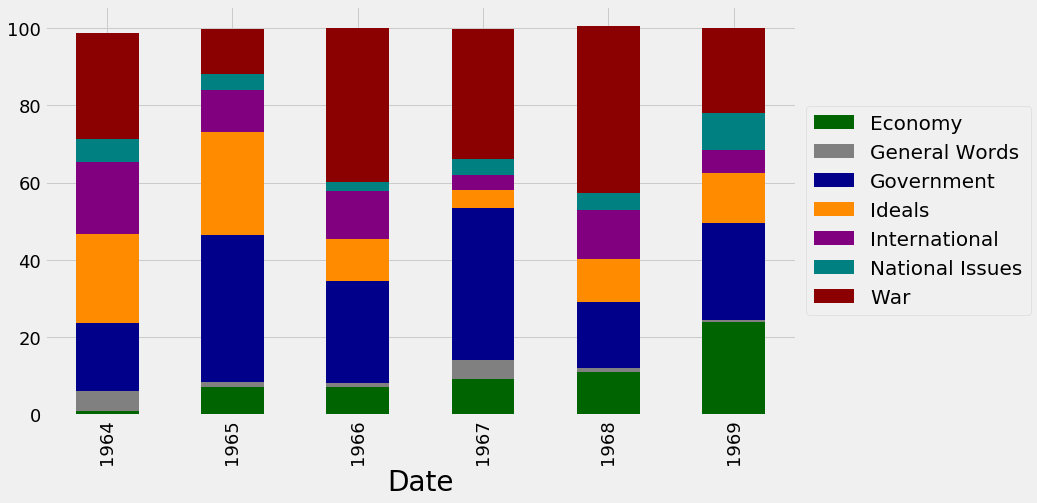

In [73]:
color_list = [cat_colors[cat] for cat in time_cats.columns]
time_cats.plot(kind='bar', stacked=True, color=color_list)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### Nixon Addresses

In [74]:
pres = 'Richard M. Nixon'

In [75]:
# topics
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_tops = topic_df.iloc[spkr_idx, :].groupby(topic_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_tops

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
1968,0.000000,21.000000,15.000000,0.00,1.000000,0.000000,2.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,26.000000,0.000000,23.000000,0.00
1969,0.000000,2.000000,0.500000,1.50,2.000000,1.500000,1.500000,1.500000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,11.000000,11.000000,0.000000,26.500000,0.50
1970,0.500000,6.500000,3.000000,0.00,0.500000,1.500000,14.500000,1.000000,42.500000,1.500000,0.000000,0.000000,0.000000,0.500000,5.500000,7.000000,7.500000,1.500000,6.000000,0.50
1971,0.250000,6.500000,2.000000,0.25,0.750000,5.750000,8.500000,24.500000,24.750000,0.500000,0.500000,0.000000,0.500000,2.000000,5.250000,8.250000,3.750000,0.750000,4.500000,1.75
1972,1.000000,9.666667,3.000000,4.00,2.333333,0.166667,6.333333,5.333333,34.166667,0.166667,0.333333,0.166667,0.333333,0.666667,3.333333,9.000000,11.166667,0.666667,7.166667,0.50
1973,0.000000,8.500000,0.000000,1.00,9.750000,3.500000,1.750000,2.250000,23.000000,0.750000,3.250000,0.000000,3.250000,0.000000,0.000000,11.000000,14.750000,3.000000,14.750000,0.00
1974,0.333333,8.500000,0.833333,7.50,28.500000,2.833333,7.500000,4.833333,2.000000,0.166667,0.500000,0.166667,1.666667,0.000000,0.333333,8.333333,6.166667,2.833333,16.166667,0.50


In [76]:
# categories
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_cats = cat_df.iloc[spkr_idx, :].groupby(cat_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_cats

,Economy,General Words,Government,Ideals,International,National Issues,War
Date,,,,,,,
1968,2.000000,0.00,16.00,49.000000,3.000000,21.000000,10.000000
1969,2.000000,1.50,4.00,37.500000,11.000000,2.000000,41.500000
1970,15.000000,0.00,6.50,13.500000,7.500000,7.000000,50.500000
1971,10.750000,0.25,9.75,8.250000,10.250000,6.750000,55.000000
1972,7.333333,4.00,6.50,18.333333,9.666667,10.666667,43.000000
1973,5.000000,1.00,19.50,29.500000,11.000000,8.500000,26.000000
1974,9.833333,7.50,35.50,22.333333,8.333333,8.833333,7.333333


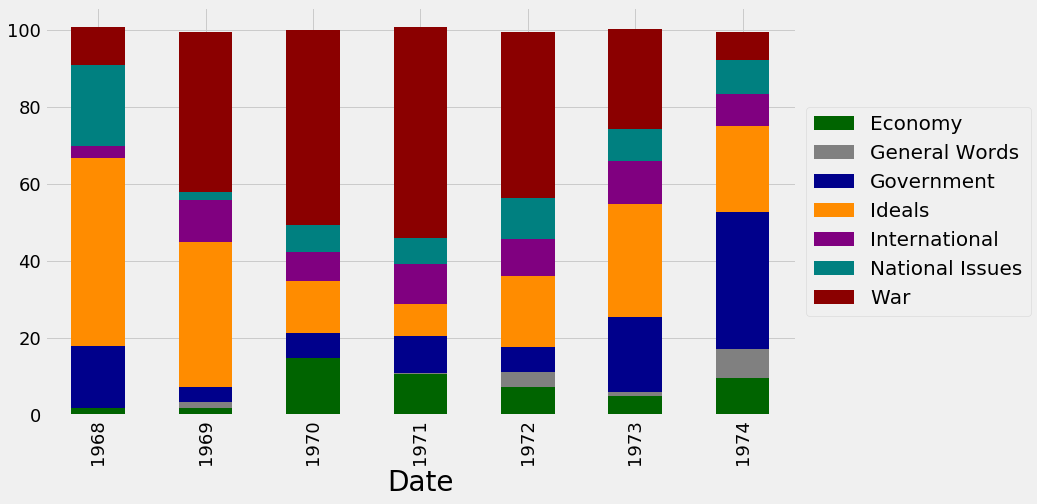

In [77]:
color_list = [cat_colors[cat] for cat in time_cats.columns]
time_cats.plot(kind='bar', stacked=True, color=color_list)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## Terror

### W Bush Addresses

In [86]:
start_date = '2001-09-11'
end_date = '2011-09-11'
pres = 'George W. Bush'

In [87]:
# topics
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_tops = topic_df.iloc[spkr_idx, :].groupby(topic_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_tops

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
2001,0.500000,18.000000,3.000000,0.000000,0.500000,1.000000,1.000000,0.0,2.500000,27.500000,0.000000,0.0,0.000000,1.000000,5.500000,3.000000,15.500000,0.00,20.500000,0.000000
2002,0.333333,28.333333,1.500000,8.166667,0.833333,1.833333,1.666667,2.5,0.500000,25.833333,2.666667,0.0,0.666667,0.333333,4.500000,8.666667,4.833333,0.00,6.333333,0.333333
2003,0.200000,21.400000,1.200000,0.800000,1.600000,5.000000,1.800000,3.4,0.200000,37.400000,1.000000,0.0,0.200000,0.000000,6.000000,10.400000,1.600000,0.80,6.000000,0.800000
2004,0.000000,34.000000,1.750000,2.500000,1.000000,0.500000,4.000000,1.0,0.000000,25.000000,0.000000,0.0,5.000000,2.000000,3.750000,5.000000,4.750000,0.75,8.750000,0.000000
2005,1.400000,17.800000,2.000000,7.600000,1.000000,4.400000,6.000000,0.4,0.200000,28.200000,0.000000,0.2,4.200000,0.000000,2.400000,1.400000,5.200000,0.40,14.400000,3.400000
2006,0.000000,24.000000,0.500000,0.000000,0.500000,1.500000,17.500000,2.0,0.000000,11.500000,0.500000,0.0,2.000000,0.000000,0.000000,5.000000,8.500000,3.50,21.500000,0.500000
2007,0.000000,15.666667,0.666667,17.333333,0.333333,4.333333,4.666667,0.0,0.333333,46.000000,1.333333,0.0,3.000000,0.666667,0.666667,0.000000,0.000000,1.00,1.666667,1.666667
2008,0.000000,19.800000,0.200000,4.000000,0.800000,0.600000,14.000000,0.0,0.400000,27.400000,0.400000,8.2,9.600000,0.800000,0.800000,7.600000,1.200000,1.60,1.400000,1.200000
2009,0.500000,8.500000,1.500000,21.500000,19.000000,0.500000,0.000000,0.0,0.000000,23.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,6.500000,0.50,17.000000,0.500000


In [88]:
# categories
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_cats = cat_df.iloc[spkr_idx, :].groupby(cat_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_cats

,Economy,General Words,Government,Ideals,International,National Issues,War
Date,,,,,,,
2001,1.000000,0.000000,4.500000,36.000000,4.000000,18.500000,35.500000
2002,2.666667,8.166667,6.833333,11.166667,9.000000,28.666667,33.333333
2003,2.800000,0.800000,9.600000,7.600000,10.400000,21.600000,47.000000
2004,9.000000,2.500000,4.000000,13.500000,7.000000,34.000000,29.750000
2005,13.800000,7.600000,7.800000,19.600000,1.400000,19.200000,31.200000
2006,20.000000,0.000000,6.500000,30.000000,5.000000,24.000000,13.500000
2007,9.333333,17.333333,7.666667,1.666667,0.666667,15.666667,47.000000
2008,33.000000,4.000000,3.600000,2.600000,8.400000,19.800000,28.600000
2009,0.500000,21.500000,21.500000,23.500000,1.000000,9.000000,23.000000


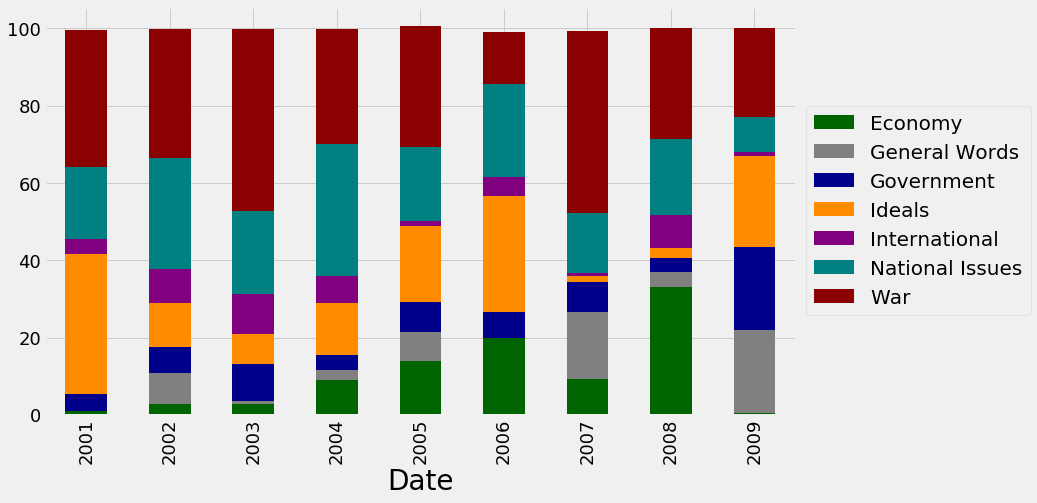

In [89]:
color_list = [cat_colors[cat] for cat in time_cats.columns]
time_cats.plot(kind='bar', stacked=True, color=color_list)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### Obama Addresses

In [90]:
pres = 'Barack Obama'

In [91]:
# topics
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_tops = topic_df.iloc[spkr_idx, :].groupby(topic_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_tops

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
Date,,,,,,,,,,,,,,,,,,,,
2008,0.000000,36.000000,4.500000,17.500000,0.000000,0.000000,1.000000,0.000000,1.500000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000,0.000000,24.000000,0.000000
2009,0.333333,30.000000,0.333333,10.888889,0.111111,2.000000,4.888889,2.333333,0.555556,10.666667,0.666667,1.888889,3.444444,0.000000,2.666667,7.666667,3.777778,3.222222,14.444444,0.333333
2010,0.333333,20.777778,0.222222,31.444444,6.111111,1.111111,9.555556,1.666667,0.111111,13.888889,0.000000,2.000000,2.222222,0.111111,0.333333,4.888889,0.333333,0.111111,4.444444,0.666667
2011,0.142857,23.571429,2.428571,14.714286,0.000000,3.142857,3.857143,2.000000,0.714286,17.857143,0.285714,0.285714,1.285714,0.714286,3.857143,9.285714,0.571429,0.428571,13.285714,1.428571


In [92]:
# categories
spkr_idx = transcripts[
    (transcripts['President'] == pres) & 
    (transcripts['Date'] >= start_date) & 
    (transcripts['Date'] <= end_date)
].index
time_cats = cat_df.iloc[spkr_idx, :].groupby(cat_df.iloc[spkr_idx, :]['Date'].dt.year).mean()
time_cats

,Economy,General Words,Government,Ideals,International,National Issues,War
Date,,,,,,,
2008,1.000000,17.500000,4.500000,30.500000,0.000000,36.000000,11.000000
2009,10.555556,10.888889,6.333333,18.222222,7.666667,30.333333,16.222222
2010,14.444444,31.444444,7.555556,4.777778,5.000000,21.111111,16.000000
2011,6.857143,14.714286,6.285714,13.857143,10.000000,23.714286,24.428571


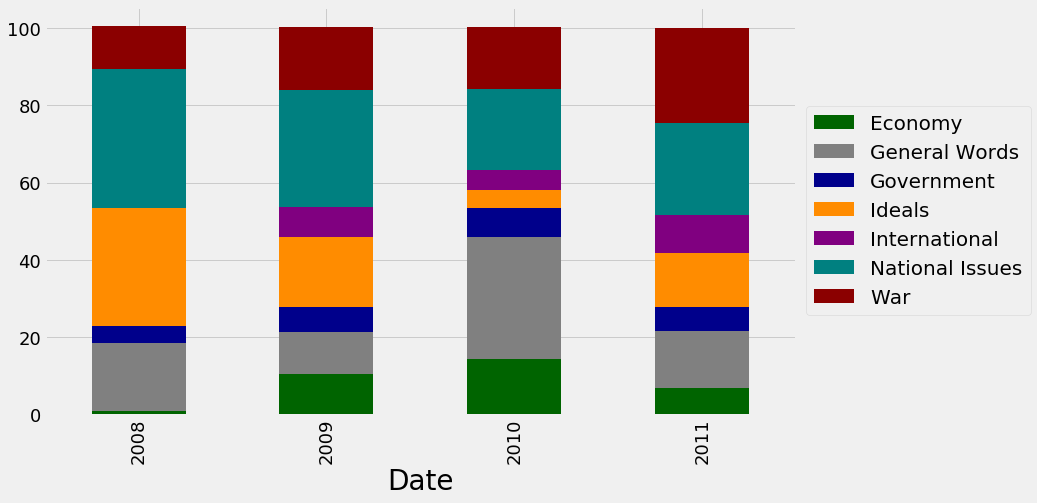

In [93]:
color_list = [cat_colors[cat] for cat in time_cats.columns]
time_cats.plot(kind='bar', stacked=True, color=color_list)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

# Recession

### Great Depression

In [ ]:
start_date = '1929-10-29'
end_date = '1939-10-29'

### Great Recession

In [ ]:
start_date = '2007-12-01'
end_date = '2009-06-01'

# WordCloud

In [94]:
from wordcloud import WordCloud

In [139]:
topic_num = 14
num_words = 10

In [117]:
comps = nmf.components_[topic_num]

In [118]:
words = tf_vectorizer.get_feature_names()

In [140]:
# sorted component value array
s_comps = [comps[i] for i in comps.argsort()[:-num_words - 1 :-1]]
s_comps

[0.7531302103375999,
 0.28843010700136,
 0.28814083228072346,
 0.2752093813279309,
 0.2549553913972383,
 0.2539940609383202,
 0.2455631277840725,
 0.2437795608007225,
 0.22740860125404133,
 0.2168394500970395]

In [154]:
# convert float array values to integer array
s_comps_int = np.rint(s_comps/min(s_comps)).astype(int)
s_comps_int

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [142]:
# sorted word array
s_words = [words[i] for i in comps.argsort()[:-num_words - 1 :-1]]
s_words

['war',
 'japanese',
 'forces',
 'men',
 'enemy',
 'german',
 'fighting',
 'germany',
 'american',
 'military']

In [146]:
[s_comps_int[i] for i in s_words]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [155]:
s_comps_int[0] * s_words[0]

'warwarwar'

In [153]:
type(s_comps_int[0])

numpy.float64

In [151]:
s_words[0] * 3

'warwarwar'

In [ ]:
# create wordcloud object
wc = WordCloud()
wc.generate(topic_array)